# Paper의 통계량, Plot 비교

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tools_ryu import mytool
from tools_ryu.cross_sectional_v3 import CrossSectional

In [8]:
data = pd.read_pickle("Data/cmktcap_data_raw.pickle")

In [9]:
c = CrossSectional(data, vender="coinmarketcap")

In [12]:
mktcap_mask = (c.mktcap > 1_000_000).replace({True:1,
                                            False:np.nan})

mktcap_screened = (c.mktcap * mktcap_mask)

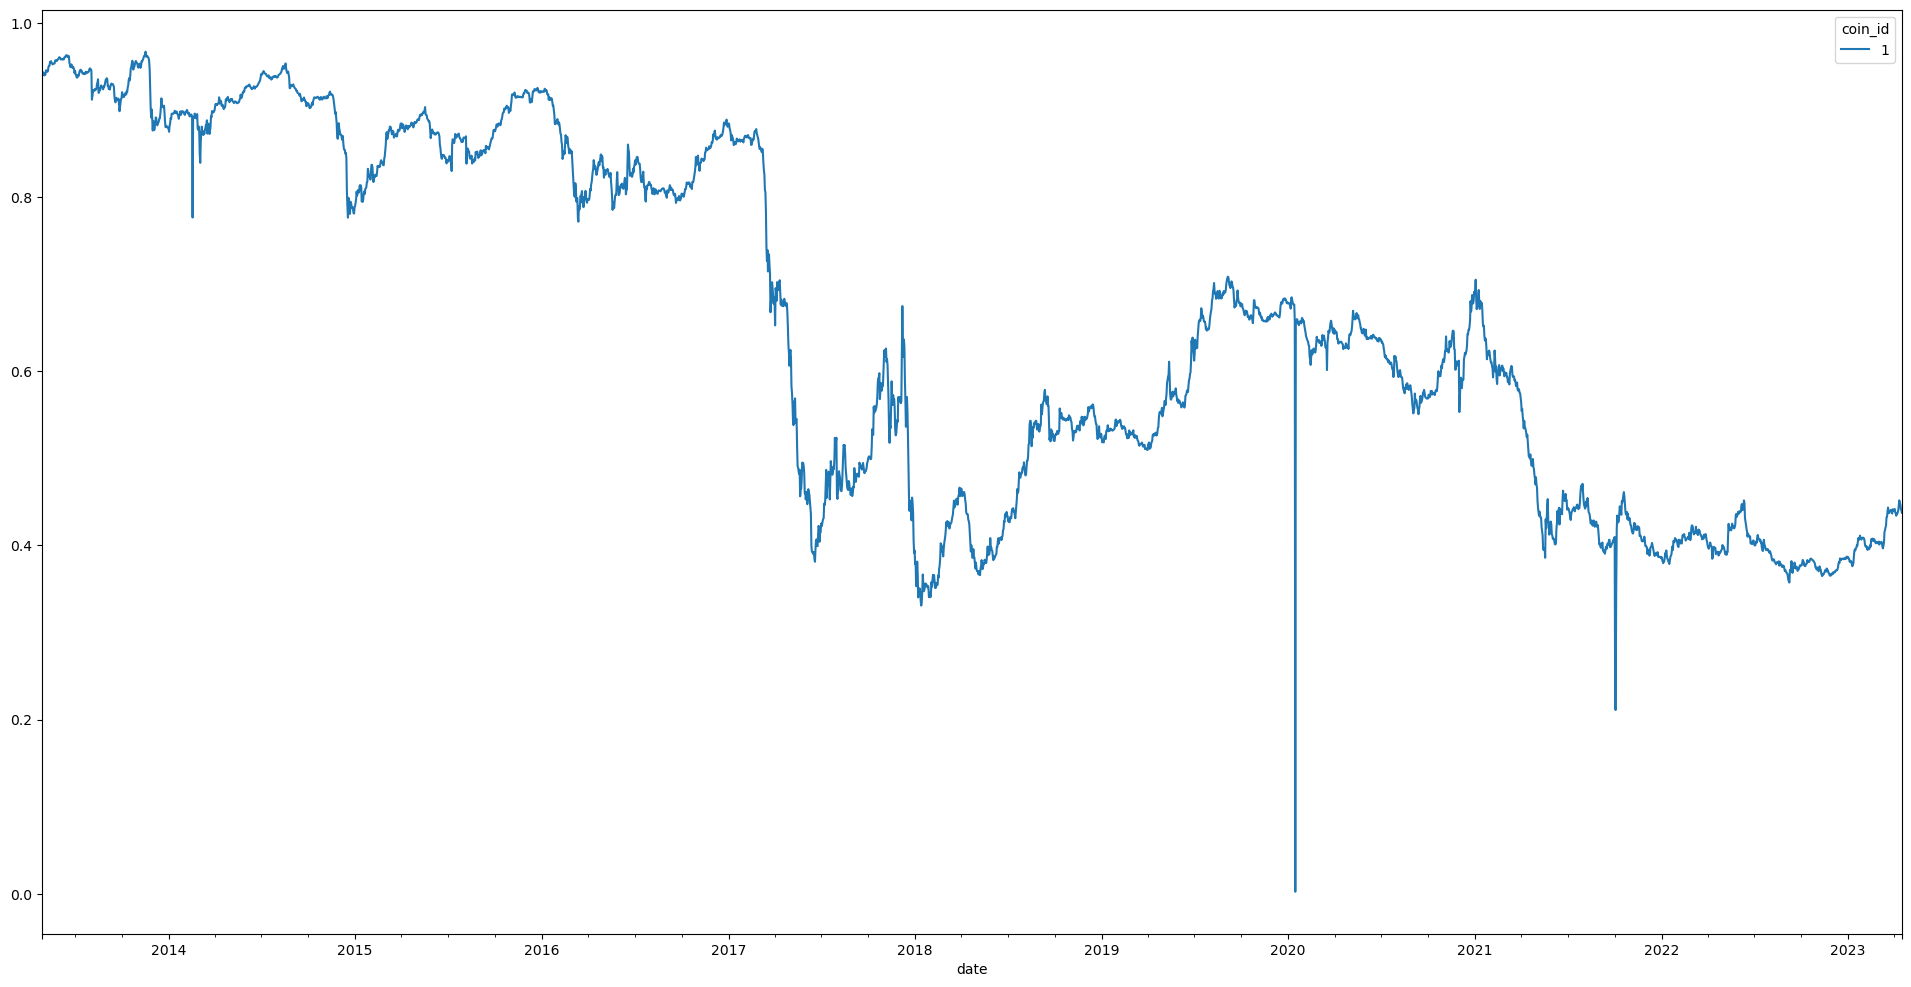

In [11]:
weight = mktcap_screened.apply(lambda x: x / np.nansum(x), axis=1)
weight[["1"]].plot(figsize=(24,12));

### Paper의 Plot과 비교

매우 일치함

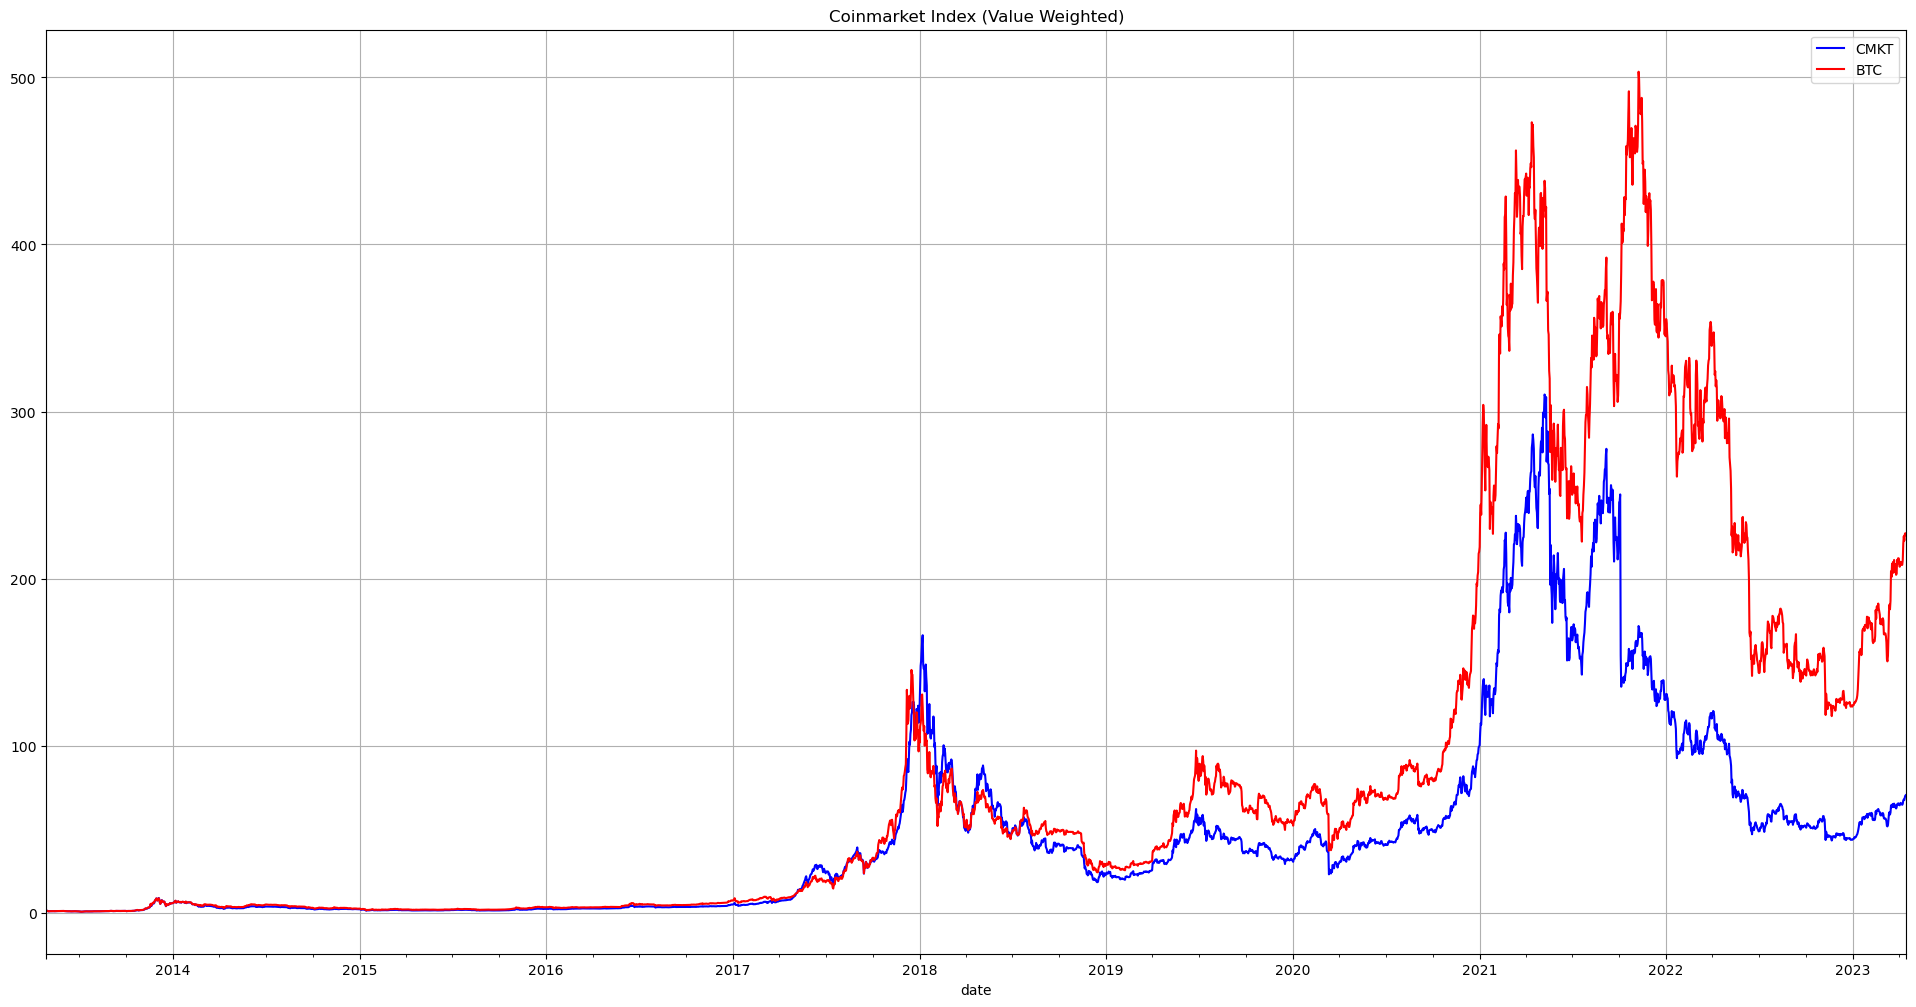

In [13]:
fig, ax = plt.subplots(1,1)

cmkt = (c.daily_rtn.drop(["825"], axis=1) * weight.drop("825",axis=1).shift(1)).sum(1)
(cmkt.loc[:] + 1).cumprod().plot(figsize=(24,12), ax=ax, c="b")

btc = c.daily_rtn[["1"]].fillna(0)
(btc + 1).loc[:].cumprod().plot(ax=ax, 
                                c="r")
ax.legend(["CMKT","BTC"])
plt.title("Coinmarket Index (Value Weighted)")
plt.grid();

### 2011~2013 데이터 붙이고, 통계량 찍어보기

Paper : 2011.1-2013.4.29 기간은 비트코인 리턴을 마켓 리턴으로 사용 ->CoinDeck 데이터

나는 cryptocompare 데이터를 사용하겠음 (CoinDeck은 망한 것 같음)

In [9]:
# 2013-04-27 이전 데이터 불러오기
cc_btc = pd.read_csv("all_coin_closeprice_cryptocompare.csv", index_col=0,
                      parse_dates=True).loc["2010-12-31":"2013-04-27",["BTC"]]

In [10]:
# BTC 데이터 concat
b = close[["1"]].copy()
b.columns.name = None
b.columns = ["BTC"]

btc_concat = pd.concat([cc_btc, b]).loc[:"2018"].pct_change().dropna()

In [11]:
btc_concat

,BTC
2011-01-01,0.000000
2011-01-02,0.000000
2011-01-03,-0.016667
2011-01-04,0.013220
2011-01-05,0.000335
...,...
2018-12-27,-0.052489
2018-12-28,0.073624
2018-12-29,-0.026379
2018-12-30,0.011921


In [17]:
# coinmarket 리턴 concat
m1 = btc_concat.loc[:"2013-04-28"]
m1.columns = ["CMKT"]

m2 = pd.DataFrame(cmkt.loc["2013":"2018"].iloc[1:].values,
             index=cmkt.loc["2013":"2018"].iloc[1:].index,
             columns=["CMKT"])

cmkt_concat = pd.concat([m1,m2]).dropna()

In [18]:
# 통계량
print("Mean:" ,cmkt_concat.mean(), btc_concat.mean())
print("Std:" , cmkt_concat.std(), btc_concat.std())
print("Skew:", cmkt_concat.skew(), btc_concat.skew())
print("Kurtosis:", cmkt_concat.kurtosis(), btc_concat.kurtosis())

Mean: CMKT    0.004621
dtype: float64 BTC    0.004686
dtype: float64
Std: CMKT    0.054432
dtype: float64 BTC    0.05431
dtype: float64
Skew: CMKT    0.751381
dtype: float64 BTC    0.823624
dtype: float64
Kurtosis: CMKT    12.639679
dtype: float64 BTC    12.622607
dtype: float64


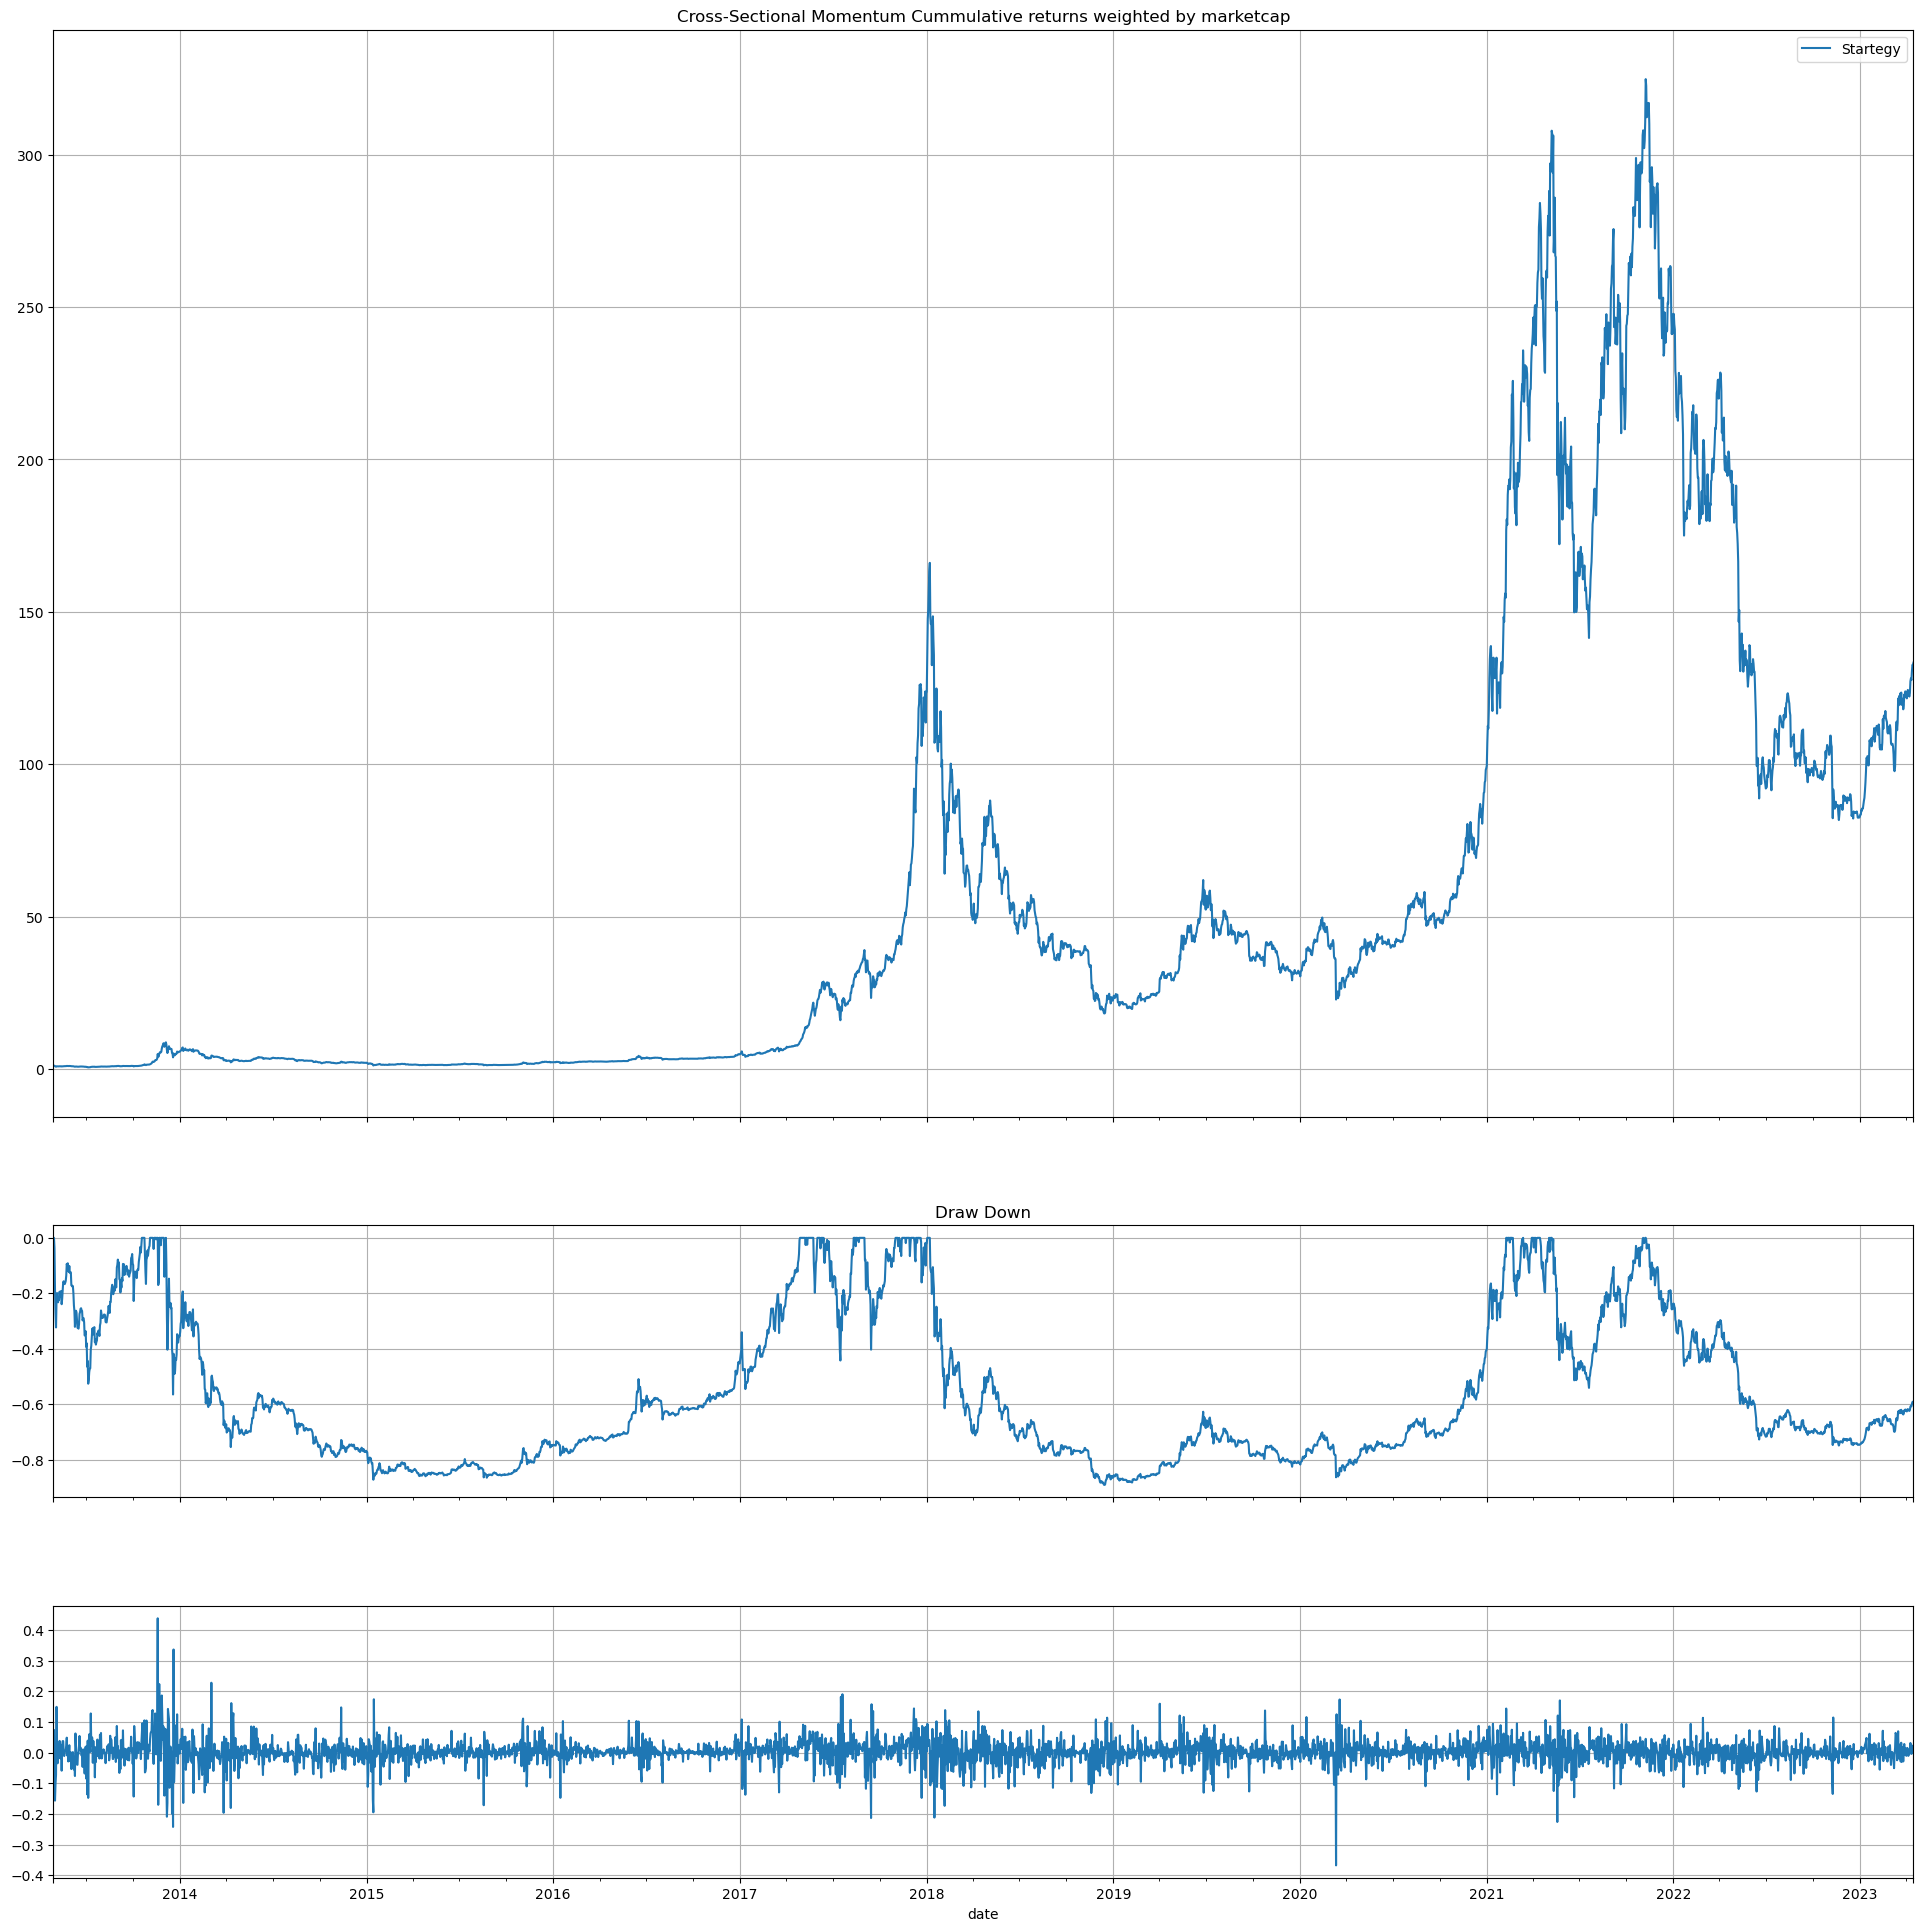

In [22]:
mytool.draw_return_result({"cmkt":cmkt}, with_mkt=False)

In [26]:
mkt_stats = mytool.print_statistics({"cmkt":cmkt}, mkt_rtn=False)
mkt_stats.columns = ["CMKT"]
mkt_stats

,CMKT
CAGR,63.308716
Mean,0.799974
STD,0.782926
Shape,1.021775
